# Rural street networks
## by Simon Syga

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import networkx as nx
import osmnx as ox
import seaborn as sns
from itertools import product, combinations
import pickle as pkl
from randomnetworkmodel import *
from street_network_from_json import *
import pandas as pd

In [2]:
datapath = r'./StreetNetworkData/'

## 1 Rural street network data
### 1.1 Rethem and Hülsen in Lower Saxony

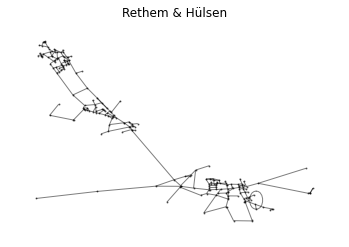

In [3]:
G_ls = pkl.load(open(datapath + 'lowersax_ruralgraph_drivenet.pkl', 'rb'))
pos = nx.get_node_attributes(G_ls, 'pos')
plt.title('Rethem & Hülsen')
nx.draw(G_ls, pos=pos, node_size=1, node_color='k', alpha=0.5)

In [4]:
lengthdict = dict(nx.all_pairs_dijkstra_path_length(G_ls, weight='weight'))
lengths = [lengthdict[u][v]  for u, v in combinations(G_ls.nodes(), 2)]
bc, bci, di = edge_impact(G_ls, weight='weight')


In [5]:
#bcl = list(bc.values())
bcl = bc
bcil = list(bci.values())
dil = list(di.values())

In [ ]:
print(dil)

(0.001, 0.2841511631857169)

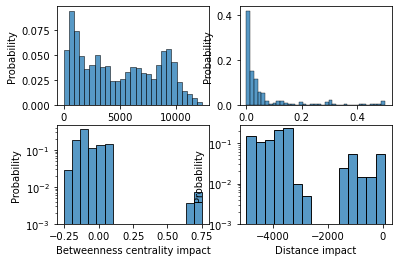

In [6]:
fig, ax = plt.subplots(2, 2)
bins = 100
ax[0, 0].set_xlabel('Distance')
ax[0, 1].set_xlabel('Betweenness centrality')
ax[1, 0].set_xlabel('Betweenness centrality impact')
ax[1, 1].set_xlabel('Distance impact')
sns.histplot(lengths, stat="probability", ax=ax[0, 0], bins='auto', label='Distance')
sns.histplot(bcl, stat="probability", ax=ax[0, 1], label='Betweenness centrality', bins='auto')
sns.histplot(bcil, stat="probability", ax=ax[1, 0], label='Betweenness centrality impact', bins='sqrt')
sns.histplot(dil, stat="probability", ax=ax[1, 1], log_scale=False, bins='sqrt', label='Distance impact')
ax[1, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].set_ylim(0.001)
ax[1, 1].set_ylim(0.001)

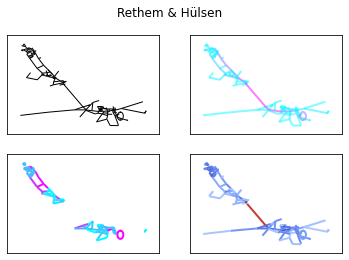

In [7]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
plt.suptitle('Rethem & Hülsen')
nx.draw_networkx_edges(G_ls, pos=pos, ax=ax[0, 0], width=1)
nx.draw_networkx_edges(G_ls, pos=pos, edge_color=bcl, edge_cmap=plt.get_cmap('cool'), alpha=0.5, ax=ax[0, 1], width=2)
nx.draw_networkx_edges(G_ls, pos=pos, edge_color=bcil, edge_cmap=plt.get_cmap('coolwarm'), ax=ax[1, 1], width=2)
nx.draw_networkx_edges(G_ls, pos=pos, edge_color=dil, edge_cmap=plt.get_cmap('cool'), ax=ax[1, 0], width=2)
# nx.draw(G_ls, pos=pos, node_size=1, node_color='k', alpha=0.5, ax=ax[1, 0])
# nx.draw(G_ls, pos=pos, node_size=1, node_color='k', alpha=0.5, ax=ax[1, 1])

### 1.2 Roßwein and Nossen in Saxony

In [8]:
G_s = pkl.load(open(datapath + 'sax_ruralgraph_drivenet.pkl', 'rb'))
pos = nx.get_node_attributes(G_s, 'pos')
# plt.title('Roßwein & Nossen')
# nx.draw(G_s, pos=pos, node_size=1, node_color='k', alpha=.5)

In [9]:
lengthdict = dict(nx.all_pairs_dijkstra_path_length(G_s, weight='weight'))
lengths = [lengthdict[u][v]  for u, v in combinations(G_s.nodes(), 2)]
bc, bci, di = edge_impact(G_s, weight='weight')

KeyboardInterrupt: 

In [ ]:
bcl = bc
bcil = list(bci.values())
dil = list(di.values())

In [ ]:
fig, ax = plt.subplots(2, 2)
bins = 100
ax[0, 0].set_xlabel('Distance')
ax[0, 1].set_xlabel('Betweenness centrality')
ax[1, 0].set_xlabel('Betweenness centrality impact')
ax[1, 1].set_xlabel('Distance impact')
sns.histplot(lengths, stat="probability", ax=ax[0, 0], bins='auto', label='Distance')
sns.histplot(bcl, stat="probability", ax=ax[0, 1], label='Betweenness centrality', bins='auto')
sns.histplot(bcil, stat="probability", ax=ax[1, 0], label='Betweenness centrality impact', bins='sqrt')
sns.histplot(dil, stat="probability", ax=ax[1, 1], log_scale=False, bins='sqrt', label='Distance impact')
ax[1, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].set_ylim(0.001)
ax[1, 1].set_ylim(0.001)

In [ ]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
plt.suptitle('Roßwein and Nossen')
nx.draw_networkx_edges(G_s, pos=pos, ax=ax[0, 0])
nx.draw_networkx_edges(G_s, pos=pos, edge_color=bcl, edge_cmap=plt.get_cmap('cool'), ax=ax[0, 1], width=2)
nx.draw_networkx_edges(G_s, pos=pos, edge_color=bcil, edge_cmap=plt.get_cmap('coolwarm'), ax=ax[1, 1], width=2)
nx.draw_networkx_edges(G_s, pos=pos, node_size=1, edge_color=dil, edge_cmap=plt.get_cmap('cool'), ax=ax[1, 0], width=1)

In [73]:
from math import isnan
f = lambda x, m: m if isnan(x) else x
dilr = [f(i, max(dil)) for i in dil]
# nx.draw_networkx(G_s, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=dilr, edge_cmap=plt.get_cmap('cool'), alpha=0.5, width=1)
# plt.show()

In [75]:
f(np.nan, 1)

1

### 1.3 Epfenbach, Spechbach, Lobenfeld, Waldwimmersbach, Michelbach, Reichartshausen in Baden-Württemberg

Text(0.5, 1.0, 'Epfenbach, Spechbach, Lobenfeld, Waldwimmersbach, Michelbach, Reichartshausen')

C:\Users\simon\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


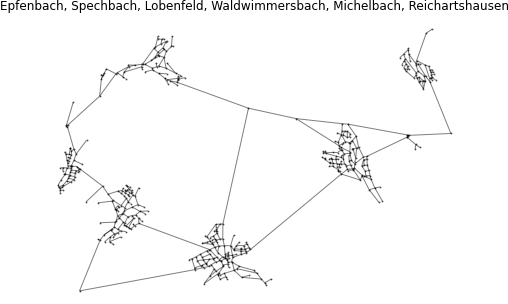

In [8]:
G_bw = pkl.load(open(datapath + 'bawue_ruralgraph_drivenet.pkl', 'rb'))
pos = nx.get_node_attributes(G_bw, 'pos')
# nx.draw(G_bw, pos=pos, node_size=1, node_color='k', alpha=0.5)
# plt.title('Epfenbach, Spechbach, Lobenfeld, Waldwimmersbach, Michelbach, Reichartshausen')

In [ ]:
lengthdict = dict(nx.all_pairs_dijkstra_path_length(G_bw, weight='weight'))
lengths = [lengthdict[u][v]  for u, v in combinations(G_bw.nodes(), 2)]
bc, bci, di = edge_impact(G_bw, weight='weight')


In [ ]:
bcl = list(bc.values())
bcil = list(bci.values())
dil = list(di.values())

In [ ]:
print(len(bcl), len(bcil), len(dil))

In [ ]:
fig, ax = plt.subplots(2, 2)
bins = 100
ax[0, 0].set_xlabel('Distance')
ax[0, 1].set_xlabel('Betweenness centrality')
ax[1, 0].set_xlabel('Betweenness centrality impact')
ax[1, 1].set_xlabel('Distance impact')
sns.histplot(lengths, stat="probability", ax=ax[0, 0], bins='auto', label='Distance')
sns.histplot(bcl, stat="probability", ax=ax[0, 1], label='Betweenness centrality', bins='auto')
sns.histplot(bcil, stat="probability", ax=ax[1, 0], label='Betweenness centrality impact', bins='sqrt')
sns.histplot(dil, stat="probability", ax=ax[1, 1], log_scale=False, bins='sqrt', label='Distance impact')
ax[1, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].set_ylim(0.001)
ax[1, 1].set_ylim(0.001)

In [ ]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
plt.suptitle('Rethem & Hülsen')
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', alpha=0.5, ax=ax[0, 0])
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=bcl, edge_cmap=plt.get_cmap('cool'), alpha=0.5, ax=ax[0, 1], width=2)
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=bcil, edge_cmap=plt.get_cmap('coolwarm'), alpha=0.5, ax=ax[1, 1], width=2)
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=dil, edge_cmap=plt.get_cmap('cool'), alpha=0.5, ax=ax[1, 0], width=2)

We can identify the number of clusters by the number of peaks in the path length distributions!
### 1.4 Other Areas
Let's analyse the 4 of the municipalities with the lowest population density in Germany

In [23]:
co = 'Germany'
kreise = ['Eckersdorf']
# kreise = ['Büttel', 'Fredeburg', 'Bugewitz', 'Südermarsch']#, 'Süderhöft', 'Keppeshausen', 'Vogelsang-Warsin', 'Hörsten']
# kreise = ['Landkreis Prignitz']#, 'Landkreis Altmarkkreis Salzwedel', 'Landkreis Lüchow-Dannenberg', 'Landkreis Ostprignitz-Ruppin']
kreislabels = [kreis + ', ' + co for kreis in kreise]
Gs = [ox.graph_from_place(kreislabels, network_type='drive', clean_periphery=True, simplify=True).to_undirected() for kreis in kreise]
G = Gs[0]

In [ ]:
bc, bci, di = edge_impact(G, weight='length')


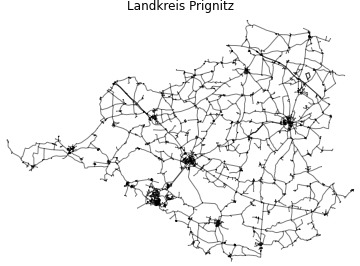

In [24]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
plt.suptitle('Eckersdorf')
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', alpha=0.5, ax=ax[0, 0])
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=bcl, edge_cmap=plt.get_cmap('cool'), alpha=0.5, ax=ax[0, 1], width=2)
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=bcil, edge_cmap=plt.get_cmap('coolwarm'), alpha=0.5, ax=ax[1, 1], width=2)
nx.draw_networkx(G_bw, pos=pos, node_size=1, with_labels=False, node_color='k', edge_color=dil, edge_cmap=plt.get_cmap('cool'), alpha=0.5, ax=ax[1, 0], width=2)



In [25]:
G = Gs[0]
lengthdict = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))
lengths = [lengthdict[u][v]  for u, v in combinations(G.nodes(), 2)]


<AxesSubplot:ylabel='Density'>

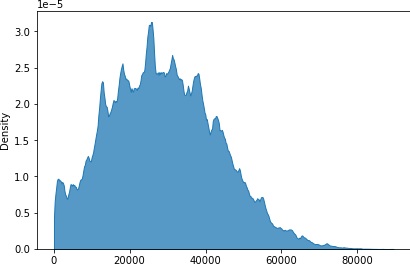

In [30]:
sns.histplot(lengths, log_scale=False, element='poly', stat='density')


In [ ]:
# import csv
# co = 'Germany'
# with open(datapath+'fraenkischeschweiz.csv', newline='', encoding='utf-8-sig') as f:
#     reader = csv.reader(f)
#     fs = list(reader)
#
# fs = [i + ', ' + co for sublist in fs for i in sublist]

In [37]:
# G_fs = ox.graph_from_place(fs, network_type='drive', clean_periphery=True, simplify=True).to_undirected()  # allows to directly download the network of a place of interest
# ox.save_graphml(G_fs, filepath=datapath+'fraenkische.graphml')
# G_fs = ox.load_graphml(datapath+'fraenkische.graphml')


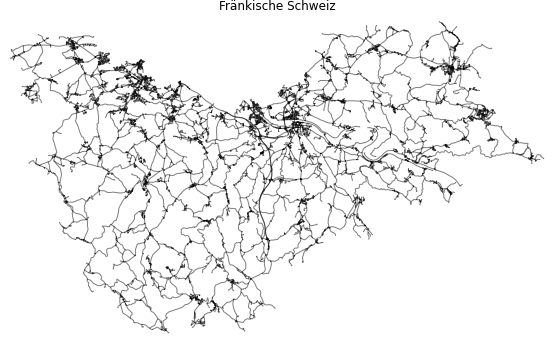

In [38]:
fig, ax = ox.plot_graph(G_fs, bgcolor='w', edge_color='k', node_color='k', edge_alpha=.5, node_alpha=.5, node_size=1, show=False)  # better visualization than networkx
ax.set_title('Fränkische Schweiz')
plt.tight_layout()

In [ ]:
print(ox.basic_stats(G_fs))  # basic stats
print(list(G_fs.edges(data=True))[0][-1])  # edge data
print(list(G_fs.nodes(data=True))[0][-1])  # node data

<AxesSubplot:ylabel='Count'>

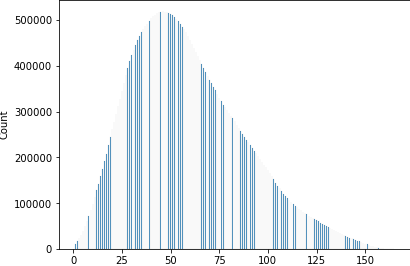

In [40]:
lengthdict = dict(nx.all_pairs_dijkstra_path_length(G_fs, weight='weight'))
lengths = [lengthdict[u][v] for u, v in combinations(G_fs.nodes(), 2)]


In [46]:
%matplotlib qt5
sns.histplot(lengths, log_scale=False, element='poly')
plt.show()

In [ ]:
edgedata = [data for _, _, data in G_fs.edges(data=True)]
df = pd.DataFrame(edgedata)
df.head()

In [ ]:
df.highway = df.highway.apply(lambda x: x[0] if type(x) == list else x)
# print(df.loc[np.where(df.highway.dtype == list), 'highway'])
print(df.highway.value_counts())
# df = df.astype({'highway': str, 'lanes': str, 'ref': str, 'name': str, 'bridge': bool})
# df.dtypes

In [ ]:
sns.histplot(data=df, x='length', element='step', log_scale=True, hue='highway', hue_order=['primary', 'secondary', 'tertiary', 'residential', 'unclassified'], fill=False, alpha=0.5)

We again find this kind of bimodal distibution with one peak at length 100 m and one at 1000 m !! One is sharper and represents the residential streets, the other is much broader and represents all other roads, connecting the villages! Let's see, if we can find this also in another rural area, Sächsische Schweiz.


### 1.6 Sächsische Schweiz-Osterzgebirge

In [ ]:
# G_ss = ox.graph_from_place('Landkreis Sächsische Schweiz-Osterzgebirge, Germany', network_type='drive', clean_periphery=True, simplify=True).to_undirected()  # allows to directly download the network of a place of interest
# ox.save_graphml(G_ss, filepath=datapath+'saechsische.graphml')
G_ss = ox.load_graphml(datapath+'saechsische.graphml')


In [ ]:
fig, ax = ox.plot_graph(G_ss, bgcolor='w', edge_color='k', node_color='k', edge_alpha=.5, node_alpha=.5, node_size=1, show=False)  # better visualization than networkx
ax.set_title('Sächsische Schweiz')
plt.tight_layout()
# nx.draw(G_fs, pos=pos, node_size=5, node_color='gray', alpha=0.5)

In [ ]:
print(ox.basic_stats(G_ss))  # basic stats
lengths = nx.get_edge_attributes(G_ss, 'length').values()
sns.histplot(lengths, log_scale=True, stat='density', legend=False)

In [ ]:
edgedata = [data for _, _, data in G_ss.edges(data=True)]
df = pd.DataFrame(edgedata)
df.highway = df.highway.apply(lambda x: x[0] if type(x) == list else x)
print(df.highway.value_counts())
sns.histplot(data=df, element='step', x='length', log_scale=True, hue='highway', hue_order=['primary', 'secondary', 'tertiary', 'residential', 'unclassified'], fill=False, alpha=0.5)